<a href="https://www.kaggle.com/code/iqmansingh/mohs-hardness-oof-preds-lgbm-catboost-xgb?scriptVersionId=150691321" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="display:fill;
           background-color:#89B9AD88;
           letter-spacing:0.5px;border-bottom: 2px solid black;">
<img src="https://raw.githubusercontent.com/IqmanS/Machine-Learning-Notebooks/main/mohs_hardness/mohs-banner.jpg">
    
<h1 style="padding: 20px; color:black; font-weight:600;font-family: 'Garamond', 'Lucida Sans', sans-serif; text-align: center; font-size: 36px;text-transform: uppercase;">Regression with Mohs Hardness Dataset</h1>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Da1. Dataset Overviewrk
sns.set_palette("viridis")
# sns.color_palette("flare")
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, median_absolute_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import optuna
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from catboost import Pool, CatBoostRegressor, cv

<div style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Table of Contents
    </h1>
</div>
<br>
<a href="#1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 1. Dataset Overview </a><br>
<a href="#2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 2. EDA </a><br>
<a href="#3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 3. Simple Data Preprocessing </a><br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 4. Training Models </a><br>
<a href="#4.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 4.1 Baseline RandomForest Model </a><br>
<a href="#4.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 4.2 Baseline CatBoost Model </a><br>
<a href="#4.3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 4.3 Baseline LGBM Model </a><br>
<a href="#4.4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 4.4 Baseline XGB Model </a><br>
<a href="#4.5" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 4.5 Optuna LGBM Model </a><br>
<a href="#4.6" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 4.6 Optuna XGB Model </a><br>
<a href="#4.7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 4.7 Voting Regressor </a><br>
<a href="#4.7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 16px;padding-left: 25px;"> 4.8 OOF Predictions </a><br>
<a href="#6" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 5. Plotting Feature Importance </a><br>
<a href="#7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 6. Creating 'submission.csv' </a><br>
<a href="#8" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 22px;"> 7. Conclusion </a>

<div id="1" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Dataset Overview
    </h1>
</div>

In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv", index_col="id")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv",index_col="id")
sample = pd.read_csv("/kaggle/input/playground-series-s3e25/sample_submission.csv")
sample["Hardness"] = 0

In [3]:
train_data.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


In [5]:
train_data.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [6]:
test_data.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000
mean,126.460128,14.794020,17.406186,4.546852,38.422790,10.921512,2.608119,1.737907,0.949638,0.491675,2.152065
std,207.564499,18.982447,10.996089,0.683158,27.344351,1.378980,0.322873,0.190584,0.179266,0.060829,1.958213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.584314,2.527500,1.678000,0.866667,0.476095,0.812440
50%,100.000000,10.650000,12.666667,4.750000,26.203827,11.202760,2.706000,1.736000,0.920000,0.488550,1.351550
75%,128.000000,16.601328,22.000000,4.800000,48.719500,11.645560,2.806667,1.820000,0.990000,0.496118,2.780220
max,10116.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615333,0.825990,10.970000


<div id="2" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Exploratory Data Analysis
    </h1>
</div>

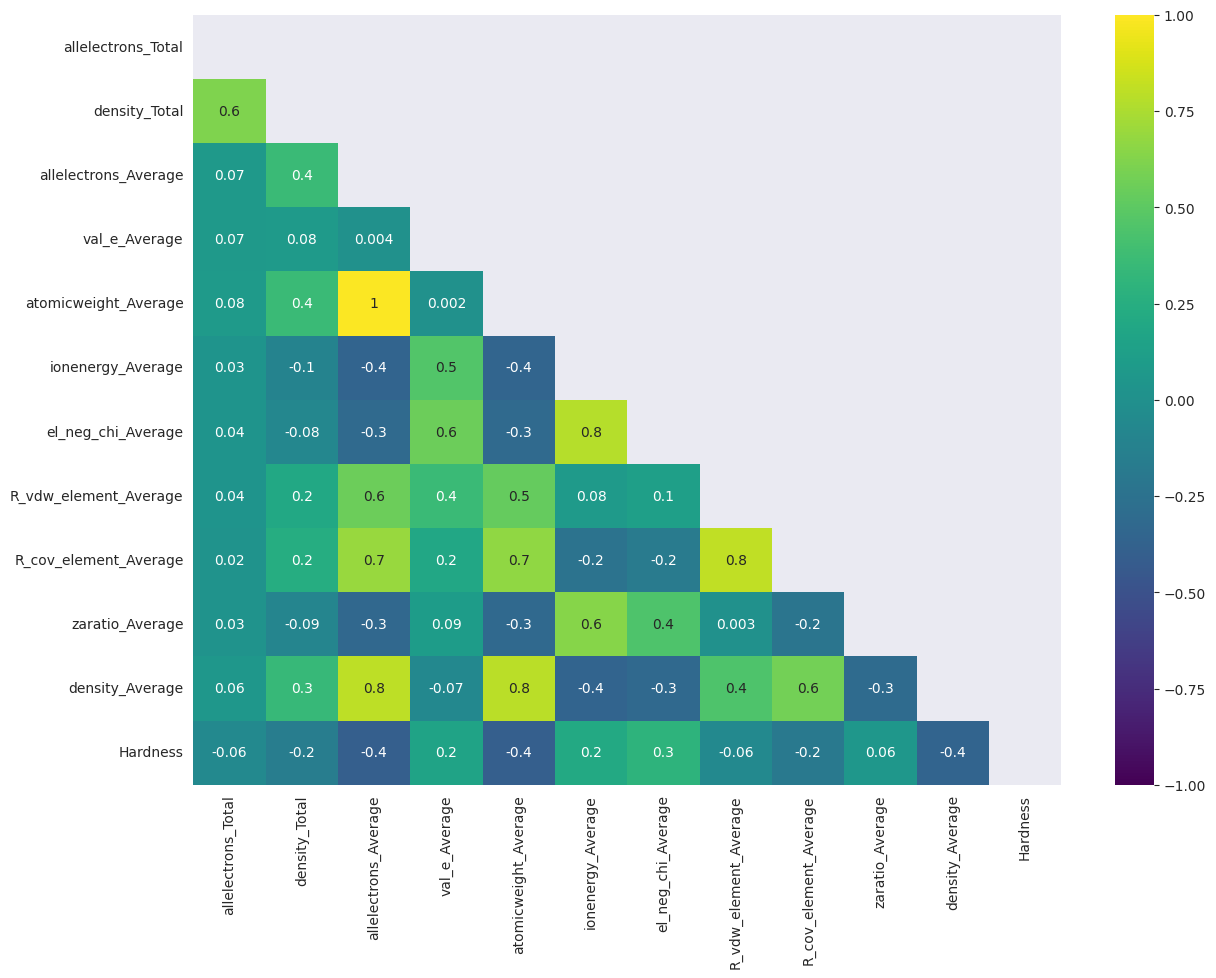

In [7]:
mask = np.triu(np.ones_like(train_data.corr()))
plt.figure(figsize=(14,10))
sns.heatmap(train_data.corr(), cmap="viridis", annot=True, mask=mask,vmin=-1,vmax=1,fmt=".1g");

In [8]:
fig,axes = plt.subplots(12,2,figsize=(15, 40),dpi=300)

for ind,col in enumerate(train_data.columns):
    plt.subplot(12,2,2*ind+1)
    sns.histplot(train_data[col],bins=15,kde=True)
    plt.gca().set_title(col)
    
    plt.subplot(12,2,2*ind+2)
    sns.boxplot(train_data[col],orient="h")
    plt.gca().set_title(col)

fig.tight_layout()
plt.show()

<div id="3" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Simple Data Preprocessing
    </h1>
</div>

In [9]:
for i in train_data.columns: 
    if i=="Hardness":
        continue
    Q1 = train_data[i].quantile(0.25)
    Q3 = train_data[i].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3+1.5*IQR
    lower_limit = Q1-1.5*IQR 
#     print(upper_limit,lower_limit)
    train_data[i].clip(lower = lower_limit,upper = upper_limit,inplace=True)   
    test_data[i].clip(lower = lower_limit,upper = upper_limit,inplace=True)

In [10]:
train_data.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,108.897647,12.860927,16.618110,4.571466,36.195643,11.014812,2.627901,1.741218,0.939378,0.486559,2.018749,4.647126
std,57.938534,8.087327,9.248754,0.576199,22.146120,0.997686,0.244784,0.122127,0.131080,0.019816,1.629525,1.680525
min,0.000000,0.000000,0.000000,2.800000,0.000000,8.970562,2.117500,1.481250,0.687500,0.446385,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,225.500000,30.354758,40.000000,6.000000,91.350411,13.290823,3.217500,1.991250,1.158167,0.525881,5.631675,10.000000


<div id="4" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Training Models
    </h1>
</div>

In [11]:
seed = np.random.seed(6)

X = train_data.drop(["Hardness"],axis=1)
y = train_data["Hardness"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

<div id="4.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #263A29; font-weight: normal; font-size: 26px;">
  - Evaluation Metric (Median Abs Error):
    </h1>
</div>
\begin{align}
MedAE (y,\hat{y}) = median(| y_i - \hat {y}_i |,...,| y_n - \hat {y}_n |)
\end{align}
<br>




<div id="4.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   3.1 Baseline RandomForest Model
    </h1>
</div>
<hr>

In [12]:
rfmodel = RandomForestRegressor(random_state=seed)
rfmodel.fit(X,y)
print("CV MedAE of Baseline RF is",-1*cross_val_score(rfmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Baseline RF is",-1*cross_val_score(rfmodel,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Baseline RF is 0.6686249999999989
CV MAE of Baseline RF is 0.9141702310023203


<div id="4.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   3.2 Baseline CatBoost Model
    </h1>
</div>
<hr>

In [13]:
catmodel = CatBoostRegressor(random_state=seed,verbose=0)
catmodel.fit(X,y)
print("CV MedAE of Baseline Cat is",-1*cross_val_score(catmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Baseline Cat is",-1*cross_val_score(catmodel,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Baseline Cat is 0.655941734578502
CV MAE of Baseline Cat is 0.9038256103728572


<div id="4.3" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   3.3 Baseline LGBM Model
    </h1>
</div>
<hr>

In [14]:
lgbmmodel = LGBMRegressor(random_state=seed)
lgbmmodel.fit(X,y)
print("CV MedAE of Baseline LGBM is",-1*cross_val_score(lgbmmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Baseline LGBM is",-1*cross_val_score(lgbmmodel,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Baseline LGBM is 0.6514628629204042
CV MAE of Baseline LGBM is 0.9013142284224341


<div id="4.4" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   3.4 Baseline XGB Model
    </h1>
</div>
<hr>

In [15]:
xgbmodel = XGBRegressor(random_state=seed)
xgbmodel.fit(X,y)
print("CV MedAE of Baseline XGB is",-1*cross_val_score(xgbmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Baseline XGB is",-1*cross_val_score(xgbmodel,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Baseline XGB is 0.6743533492088318
CV MAE of Baseline XGB is 0.9368558914423512


<div id="4.5" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   3.5 Optuna LGBM Model
    </h1>
</div>
<hr>

In [16]:
# def objective(trial):
#     params = {
#         'n_estimators' : trial.suggest_int('n_estimators',500,1000),
#         "max_depth":trial.suggest_int('max_depth',3,50),
#         "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.25, log=True),
#         "min_child_weight" : trial.suggest_float('min_child_weight', 0.5,4),
#         "min_child_samples" : trial.suggest_int('min_child_samples',1,250),
#         "subsample" : trial.suggest_float('subsample', 0.2, 1),
#         "subsample_freq" : trial.suggest_int('subsample_freq',0,5),
#         "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
#         'num_leaves' : trial.suggest_int('num_leaves', 2, 128),
#     }
#     lgbmmodel_optuna = LGBMRegressor(**params,random_state=seed,device="gpu")
#     cv = -1*cross_val_score(lgbmmodel_optuna, X, y, cv = 4,scoring='neg_median_absolute_error').mean()
#     return cv

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100,timeout=2000)

In [17]:
lgbm_params = {'n_estimators': 785, 'max_depth': 36, 'learning_rate': 0.01417471417676199,
               'min_child_weight': 1.1070027262610547, 'min_child_samples': 15,
               'subsample': 0.6061322281791591, 'subsample_freq': 3,
               'colsample_bytree': 0.4174456813911724, 'num_leaves': 55}

lgbmopt = LGBMRegressor(**lgbm_params,random_state=seed)
lgbmopt.fit(X,y)
print("CV MedAE of Optuna LGBM is",-1*cross_val_score(lgbmopt,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Optuna LGBM is",-1*cross_val_score(lgbmopt,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Optuna LGBM is 0.6432687761706863
CV MAE of Optuna LGBM is 0.8889393350256796


<div id="4.6" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   3.6 Optuna XGB Model
    </h1>
</div>
<hr>

In [18]:
# def objective(trial):
#     params = {
#         'n_estimators' : trial.suggest_int('n_estimators',500,1000),
#         'max_depth':  trial.suggest_int('max_depth',3,50),
#         'min_child_weight': trial.suggest_float('min_child_weight', 2,50),
#         "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.2,log=True),
#         'subsample': trial.suggest_float('subsample', 0.2, 1),
#         'gamma': trial.suggest_float("gamma", 1e-4, 1.0),
#         "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
#         "colsample_bylevel" : trial.suggest_float('colsample_bylevel',0.2,1),
#         "colsample_bynode" : trial.suggest_float('colsample_bynode',0.2,1),
#     }
#     xgbmodel_optuna = XGBRegressor(**params,random_state=seed,tree_method = "gpu_hist",eval_metric= "MedAE")
#     cv = -1*cross_val_score(xgbmodel_optuna, X, y, cv = 4,scoring='neg_median_absolute_error').mean()
#     return cv

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100,timeout=2000)

In [19]:
xgb_params = {'n_estimators': 887, 'max_depth': 9, 'min_child_weight': 10.170221895950583,
              'learning_rate': 0.008383026974789366, 'subsample': 0.6705032929674755,
              'gamma': 0.6206804342071246, 'colsample_bytree': 0.6811067581297359,
              'colsample_bylevel': 0.8931207102930049, 'colsample_bynode': 0.9326927674256934}

xgbopt = XGBRegressor(**xgb_params,random_state=seed)
xgbopt.fit(X,y)
print("CV MedAE of Optuna XGB is",-1*cross_val_score(xgbopt,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Optuna XGB is",-1*cross_val_score(xgbopt,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Optuna XGB is 0.6352020144462586
CV MAE of Optuna XGB is 0.8887661863082047


<div id="4.7" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   3.7 Voting Regressor
    </h1>
</div>
<hr>

In [20]:
vrmodel = VotingRegressor([("rf",rfmodel),("cat",catmodel),("lgbm",lgbmmodel),("xgb",xgbopt)])
vrmodel.fit(X,y)
print("CV MedAE of Voting Regressor is",-1*cross_val_score(vrmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Voting Regressor is",-1*cross_val_score(vrmodel,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Voting Regressor is 0.6469924534107514
CV MAE of Voting Regressor is 0.8926002331482045


<div id="4.8" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   3.8 OOF Predictions XGB + LGBM + Cat
    </h1>
</div>
<hr>

In [21]:
lgbm_params = {'n_estimators': 2500, 'max_depth': 36, 'learning_rate': 0.01417471417676199,
               'min_child_weight': 1.1070027262610547, 'min_child_samples': 15,
               'subsample': 0.6061322281791591, 'subsample_freq': 3,
               'colsample_bytree': 0.4174456813911724, 'num_leaves': 55}

xgb_params = {'n_estimators': 2500, 'max_depth': 9, 'min_child_weight': 10.170221895950583,
              'learning_rate': 0.008383026974789366, 'subsample': 0.6705032929674755,
              'gamma': 0.6206804342071246, 'colsample_bytree': 0.6811067581297359,
              'colsample_bylevel': 0.8931207102930049, 'colsample_bynode': 0.9326927674256934}

In [22]:
SPLITS = 4
REPEATS = 1
lgbm_MedAE_score = []
cat_MedAE_score = []
xgb_MedAE_score = []

for i,(tr,val) in enumerate(RepeatedKFold(n_splits=SPLITS, n_repeats=REPEATS,random_state=seed).split(X,y)):
    
    print("-"*30,f"FOLD {i+1}/{SPLITS*REPEATS}","-"*30)
    X_train, X_test, y_train, y_test = X.iloc[tr,:],X.iloc[val,:],y.iloc[tr],y.iloc[val]
    
    print("\n->","LGBM:")
    lgbmmodel = LGBMRegressor(**lgbm_params,random_state=seed,device="gpu")
    lgbmmodel.fit(X_train,y_train, eval_set=[(X_test,y_test)], eval_names=["valid"],eval_metric=['mae'], early_stopping_rounds=1000,verbose = 500)
    MedAE = median_absolute_error(y_test, lgbmmodel.predict(X_test))
    MAE = mean_absolute_error(y_test, lgbmmodel.predict(X_test))
    print(f"\nFold {i+1} MedAE of LGBM =", MedAE)
    print(f"Fold {i+1} MAE of LGBM =", MAE,"\n")
    lgbm_MedAE_score.append(MedAE)
    sample["Hardness"] += lgbmmodel.predict(test_data)
    
    print("\n->","CAT:")
    train_dataset = Pool(data=X.iloc[tr,:],label=y.iloc[tr])
    eval_dataset = Pool(data=X.iloc[val,:],label=y.iloc[val])
    
    catmodel = CatBoostRegressor(iterations=2500,verbose=500, od_type="Iter",eval_metric="MAE", random_seed=seed,early_stopping_rounds=1000)
    catmodel.fit(train_dataset, use_best_model=True, eval_set=eval_dataset)
    MedAE = median_absolute_error(y.iloc[val], catmodel.predict(X.iloc[val,:]))
    MAE = mean_absolute_error(y_test, catmodel.predict(X_test))
    print(f"\nFold {i+1} MedAE of CAT =", MedAE)
    print(f"Fold {i+1} MAE of CAT =", MAE,"\n")
    cat_MedAE_score.append(MedAE)
    sample["Hardness"] += catmodel.predict(test_data)
    
    print("\n->","XGB:")
    xgbmodel = XGBRegressor(**xgb_params,random_state=seed, tree_method= 'gpu_hist',eval_metric="mae",early_stopping_rounds = 1000)
    xgbmodel.fit(X_train,y_train, eval_set=[(X_test,y_test)],verbose = 500,callbacks=[EarlyStopping(rounds = 1000,save_best=True)])
    MedAE = median_absolute_error(y_test, xgbmodel.predict(X_test))
    MAE = mean_absolute_error(y_test, xgbmodel.predict(X_test))
    print(f"\nFold {i+1} MedAE of XGB =", MedAE)
    print(f"Fold {i+1} MAE of XGB =", MAE,"\n")
    xgb_MedAE_score.append(MedAE)
    sample["Hardness"] += xgbmodel.predict(test_data)
    
print("\n\n","-"*50,sep="")
print("CV score of LGBM is ",np.array(lgbm_MedAE_score).mean())
print("CV score of CAT is ",np.array(cat_MedAE_score).mean())
print("CV score of XGB is ",np.array(xgb_MedAE_score).mean())

------------------------------ FOLD 1/4 ------------------------------

-> LGBM:
[500]	valid's l1: 0.895932	valid's l2: 1.49316
[1000]	valid's l1: 0.89484	valid's l2: 1.50327
[1500]	valid's l1: 0.898166	valid's l2: 1.5136

Fold 1 MedAE of LGBM = 0.6528707406606518
Fold 1 MAE of LGBM = 0.8931341838974314 


-> CAT:
Learning rate set to 0.040203
0:	learn: 1.4745570	test: 1.4466439	best: 1.4466439 (0)	total: 3.34ms	remaining: 8.36s
500:	learn: 0.7976738	test: 0.9163873	best: 0.9163873 (500)	total: 1.37s	remaining: 5.49s
1000:	learn: 0.7079914	test: 0.9086539	best: 0.9086539 (1000)	total: 2.75s	remaining: 4.13s
1500:	learn: 0.6418790	test: 0.9074770	best: 0.9070627 (1186)	total: 4.14s	remaining: 2.76s
2000:	learn: 0.5897692	test: 0.9075273	best: 0.9070614 (1735)	total: 5.57s	remaining: 1.39s
2499:	learn: 0.5443381	test: 0.9079382	best: 0.9070614 (1735)	total: 6.94s	remaining: 0us

bestTest = 0.9070614458
bestIteration = 1735

Shrink model to first 1736 iterations.

Fold 1 MedAE of CAT = 0.

<div id="6" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Plotting Feature Importance
    </h1>
</div>

In [23]:
history = pd.DataFrame()
def plotImportance(modelName,model):
    history["cols"] = X_test.columns
    history["imp"] = model.feature_importances_
    history.sort_values("imp",inplace=True,ascending=False)
    history.reset_index(drop=True)
    plt.figure(figsize=(15,5))
    sns.barplot(x=history["imp"],y=history["cols"],palette="rocket");
    plt.title("Feature Imporance of "+modelName)

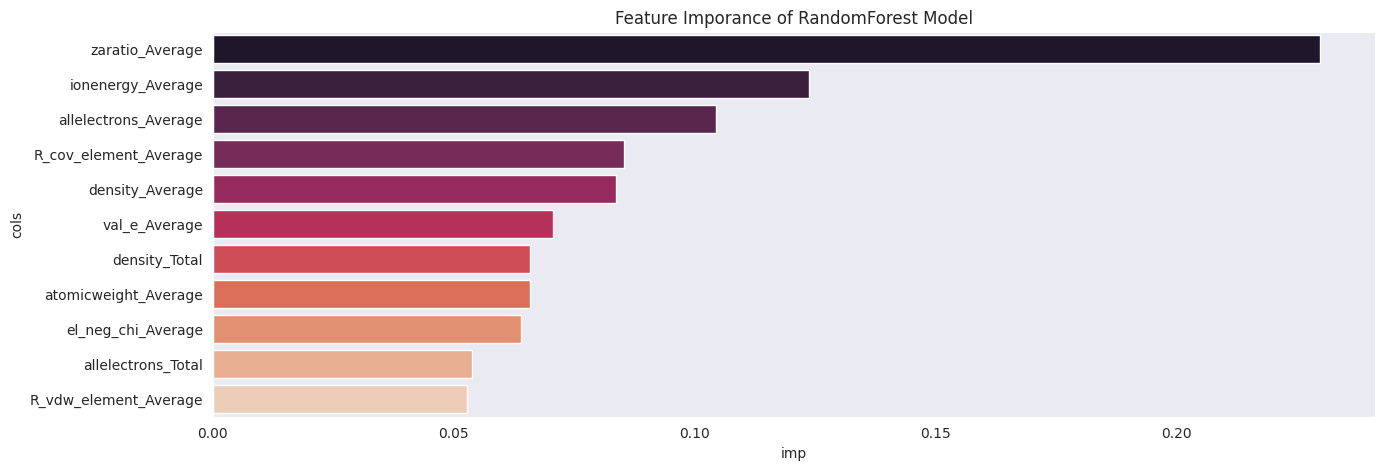

In [24]:
plotImportance("RandomForest Model",rfmodel)

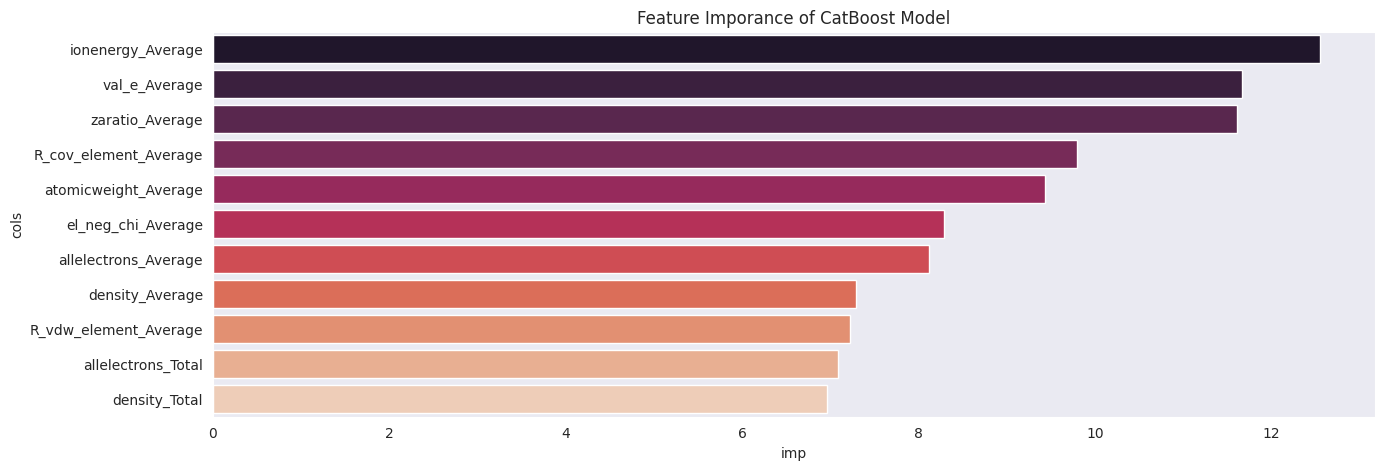

In [25]:
plotImportance("CatBoost Model",catmodel)

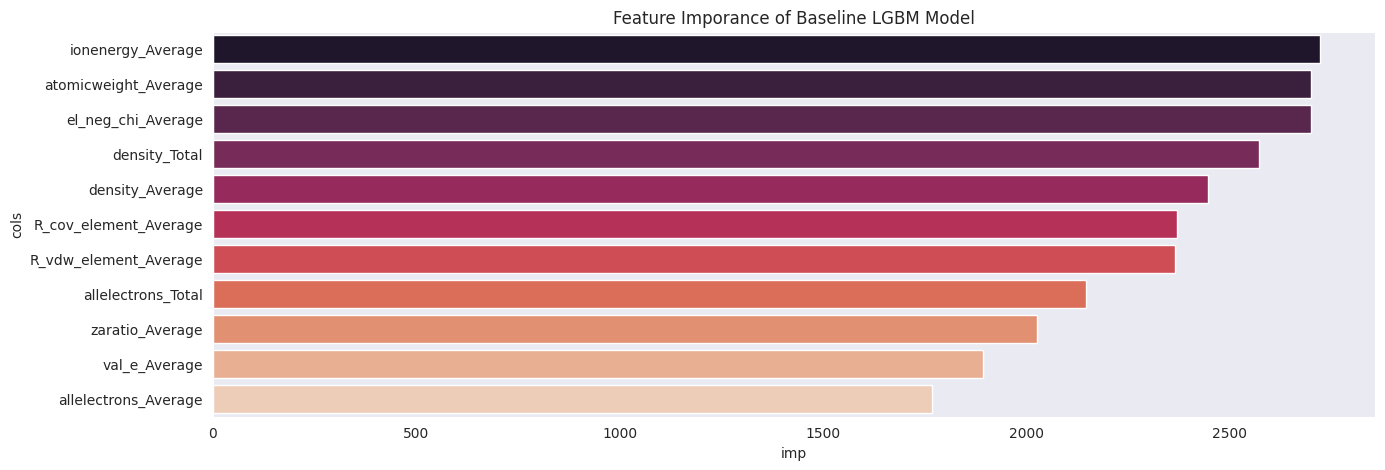

In [26]:
plotImportance("Baseline LGBM Model",lgbmmodel)

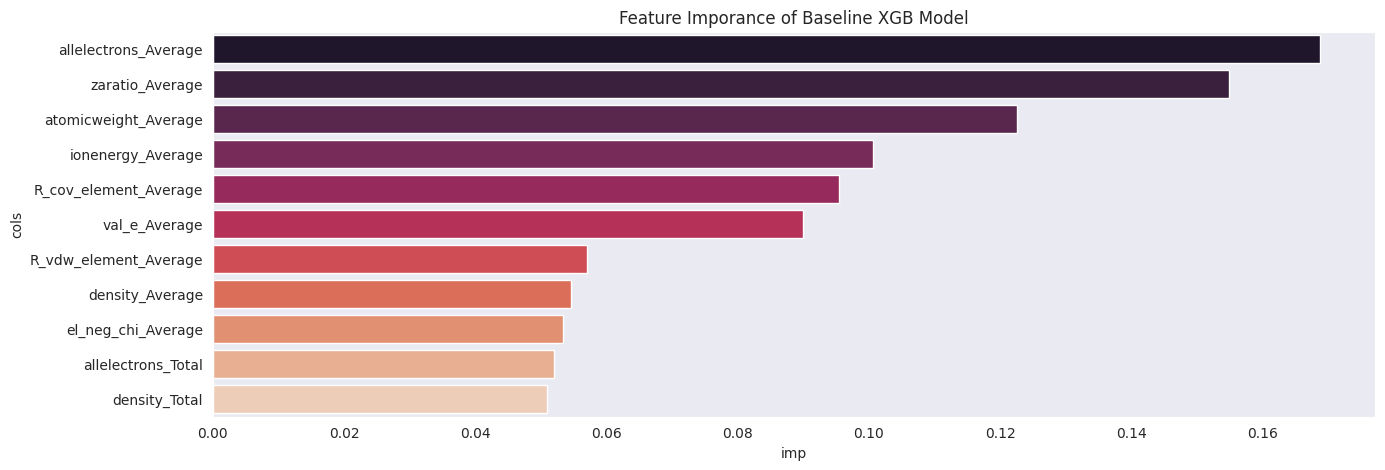

In [27]:
plotImportance("Baseline XGB Model",xgbmodel)

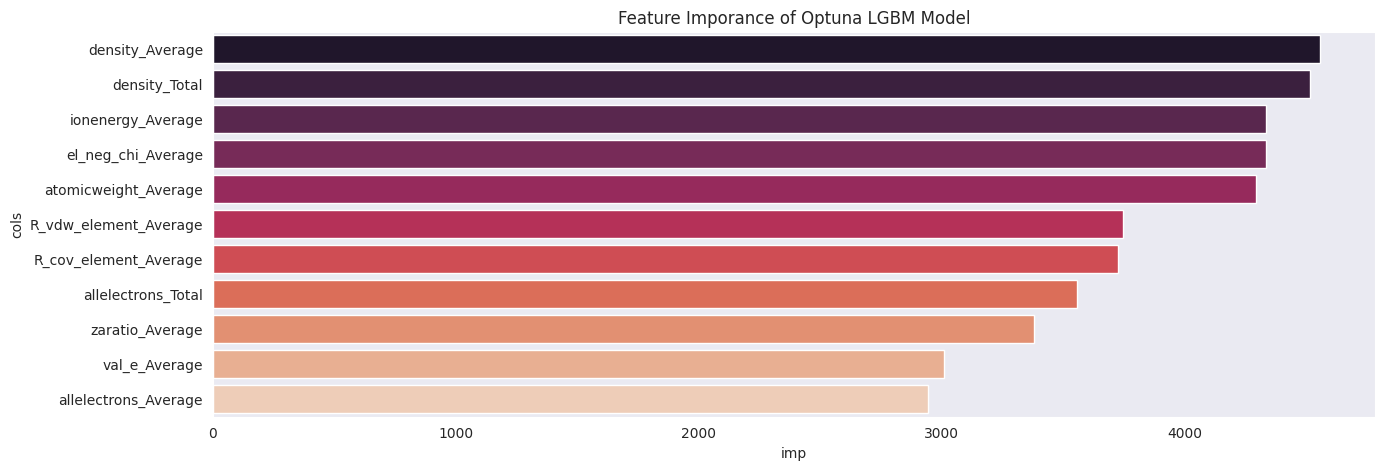

In [28]:
plotImportance("Optuna LGBM Model",lgbmopt)

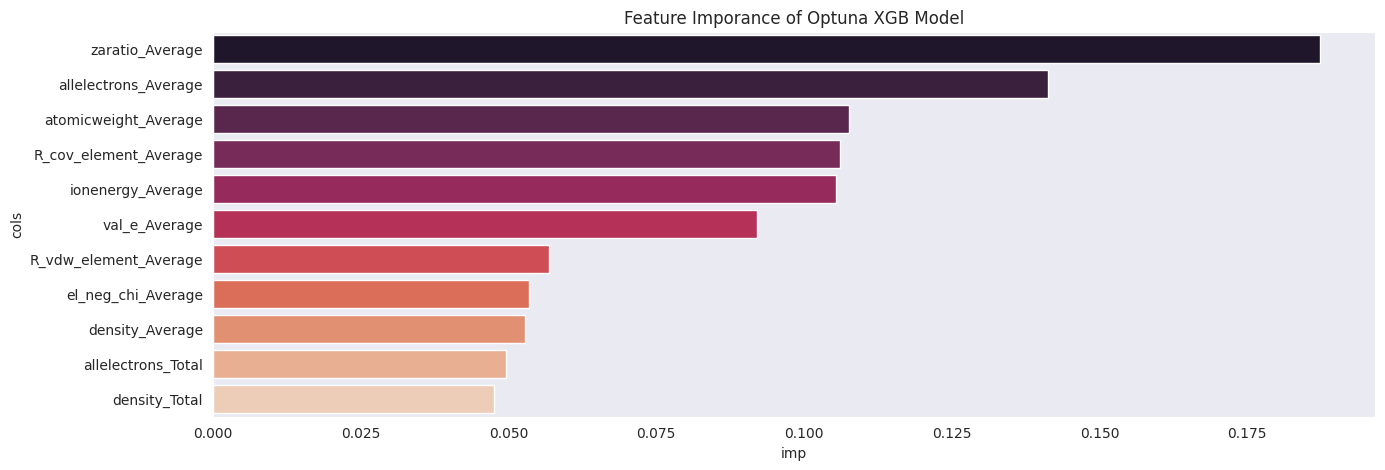

In [29]:
plotImportance("Optuna XGB Model",xgbopt)

<div id="7" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Creating 'submission.csv'
    </h1>
</div>

In [30]:
# rf_preds = rfmodel.predict(test_data)
# cat_preds = catmodel.predict(test_data)
# lgbm_preds = lgbmmodel.predict(test_data)
# preds = (rf_preds + cat_preds + lgbm_preds)/3
# preds = vrmodel.predict(test_data)
# sample["Hardness"] = preds

In [31]:
sample["Hardness"] = sample["Hardness"]/(3*SPLITS*REPEATS)

In [32]:
sample.to_csv("submission.csv",index=False,header=True)

<div id = "8" style="background-color: #89B9AD88; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Conclusion
    </h1>
    <h3 style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: center; color: #505050; line-height: 1.6;">
    If you found the notebook helpful, please Upvote the Notebook😊<br>
    If you have any suggestion, feel free to Comment & Tag me<br>
    </h3>
</div>

